# Pressure in the TGV 🚄
## Introduction
Nowadays, in many smartphones, one can find a barometer. This sensor measures the atmospheric pressure, which is a function of the elevation and the meteorological conditions. If the experiment occurs in a small region (a city, for instance) and during a short time, the meteorological conditions could be neglected.

During a travel in the TGV (French high-speed train), I measured the pressure during about 1600 seconds. Because the TGV speed goes up to 300 km/h (186 mph), it can ride sharp slopes. Thus the effect of the elevation to the pressure is visible.

However, during this experiment, I traveled about 130 km, which is not a small are. So one should be careful of some meteorological effects during the analysis. However, the experiment was short and let's guess that these effects are negligible 🤞

## Import
First, we import the data from a raw CSV generated by [PhyPhox](https://phyphox.org/) within an iPhone 8.

<AxesSubplot:xlabel='Time (s)'>

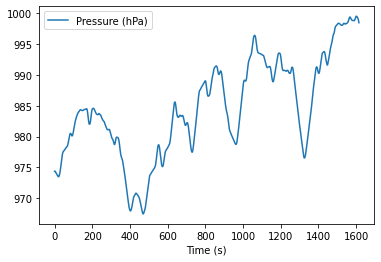

In [2]:
import pandas as pd
df = pd.read_csv("raw_data.csv")
df.plot(x=0, y=1)

## Reference elevation 📍
To deduce the elevation from the pressure, one needs to have a reference. Here we crossed the station **Le Creusot TGV** about 640 seconds after the beginning of the record. It is visible in the previous graph as a plateau. The pressure appears to about **683.5 hPa**, and the altitude of the station is 318 m ([source](https://fr.wikipedia.org/wiki/Gare_du_Creusot_TGV))

<AxesSubplot:xlabel='Time (s)'>

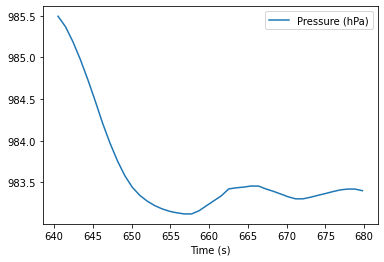

In [3]:
mask = (df["Time (s)"] > 640) & (df["Time (s)"] < 680)
df.loc[mask].plot(x=0, y=1)

## Analyze 🧮
The static of fluids give us the relation between the pressure variation $\textrm{d}p$ with respect to the elevation variation $\textrm{d}z$:
$$\frac{\textrm{d}p}{\textrm{d}z} = - \rho \, g,$$
with $\rho = 1.292 \textrm{kg}\, \textrm{m}^{-3}$ the volumic mass of the air, and $g = 9.806 \textrm{m} \, \textrm{s}^{-2}$ gravity acceleration.

Because of the small range of altitudes, we consider that the air's volumic mass is constant with the pressure, which becomes false for really high altitudes.

Here, the reference is the Creusot station at pressure $p_C$ and elevation $z_C$. Thus, by integrating the static of fluids, one finds the difference of pressure for a different elevation:
$$\int_{p_C}^{p} \textrm{d}p = - \rho \, g \int_{z_C}^{z} \textrm{d}z \,,$$
which simplifies as,
$$p - p_C = - \rho \, g (z - z_C) \, .$$

Finally, the altitude $z$ in function of the pressure reads:
$$z = z_C - \frac{p - p_C}{\rho \, g}\,.$$

In [4]:
df["Altitude (m)"] = df["Pressure (hPa)"].map(lambda x: 318 - (x-983.5)/(1.292*9.806)*100.)

<AxesSubplot:xlabel='Time (s)'>

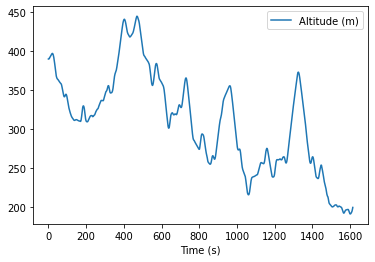

In [5]:
df.plot(x=0, y=2)

## Riding slopes 🧗‍♂️
The elevation profile could be surprising! During less than 30 minutes, the train was climbing up to 450 meters, until it rode down to 200 meters. It is possible because of the very high velocity of the train, which gives it high inertia.

## Measure accuracy ☑️
Two effects can both affect the quality of the measurments: the sensor quality, and the meteological conditions. To evaluate this, let's check the elevation arround 1550 seconds. At this moment we were passing through the station **Macon Loché TGV**. With respect to the data given in Wikipedia ([source](https://fr.wikipedia.org/wiki/Gare_de_M%C3%A2con-Loch%C3%A9-TGV)) the station's elevation is 187m. While, one reads about 195m of elevation!

The difference is quite fair actually, because we do not know exactly were the elevation was measured: tracks, platforms, station's entrance. So, this could produce a few meters of difference!

<AxesSubplot:xlabel='Time (s)'>

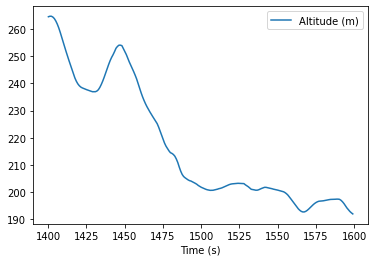

In [6]:
mask = (df["Time (s)"] > 1400) & (df["Time (s)"] < 1600)
df.loc[mask].plot(x=0,y=2)